In [1]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist, fashion_mnist
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)

# Define the hidden layer
hidden = Dense(784, activation='relu')(encoded)

# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(hidden)

In [3]:
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [4]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

4422102/4422102 [==============================] - 0s 0us/step


In [5]:
history = autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/5
235/235 [==============================] - 11s 42ms/step - loss: 0.3535 - accuracy: 0.0125 - val_loss: 0.3054 - val_accuracy: 0.0168
Epoch 2/5
235/235 [==============================] - 9s 37ms/step - loss: 0.2957 - accuracy: 0.0155 - val_loss: 0.2923 - val_accuracy: 0.0201
Epoch 3/5
235/235 [==============================] - 8s 35ms/step - loss: 0.2870 - accuracy: 0.0200 - val_loss: 0.2867 - val_accuracy: 0.0227
Epoch 4/5
235/235 [==============================] - 9s 39ms/step - loss: 0.2826 - accuracy: 0.0236 - val_loss: 0.2833 - val_accuracy: 0.0235
Epoch 5/5
235/235 [==============================] - 10s 41ms/step - loss: 0.2798 - accuracy: 0.0274 - val_loss: 0.2808 - val_accuracy: 0.0290


In [6]:
reconstructed_data = autoencoder.predict(x_test)

313/313 [==============================] - 2s 5ms/step


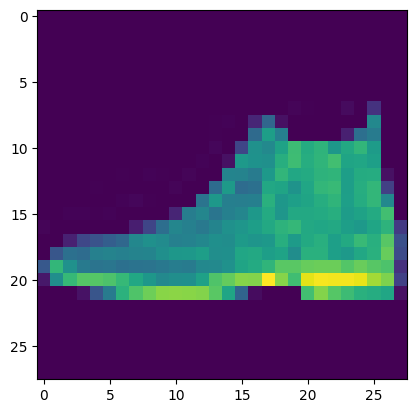

In [7]:
plt.imshow(x_test[0].reshape(28, 28))

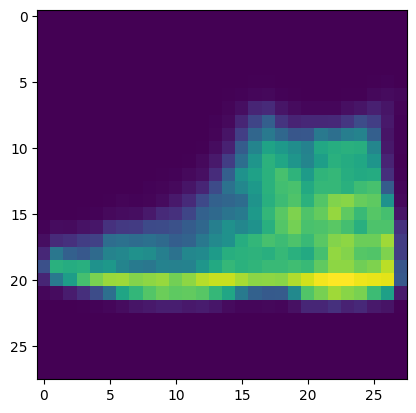

In [8]:
plt.imshow(reconstructed_data[0].reshape(28, 28))

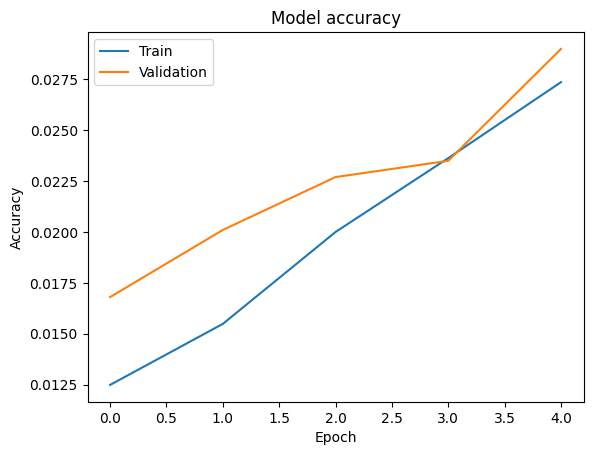

In [9]:
# Plot the training and validation accuracy over epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

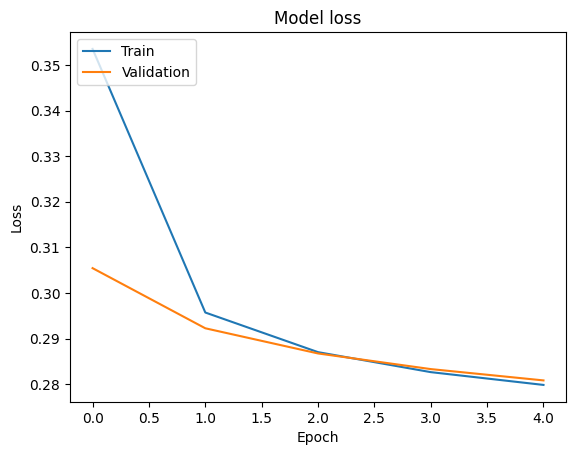

In [10]:
# Plot the training and validation loss over epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()